##### Construa um modelo para prever a temperatura média em Lajeado/RS, que inclua a componente de tendência e a componente sazonal

In [ ]:
install.packages("fpp3")    
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘warp’, ‘BH’, ‘distributional’, ‘progressr’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’, ‘urca’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(slider)
library(fpp3)
library(tsibble)
library(patchwork)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.6     ✔ tsibble     1.1.1
✔ dplyr       1.0.7     ✔ tsibbledata 0.4.0
✔ tidyr       1.1.4     ✔ feasts      0.2.2
✔ lubridate   1.8.0     ✔ fable       0.3.1

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [ ]:
df <- read.csv("https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/lajeado_rs.csv", sep = ";")
df <- df %>% 
  mutate(ano_mes = yearmonth(ano_mes)) %>% 
  select(ano_mes, temp_media) %>% 
  as_tsibble(index = ano_mes)
glimpse(df)

Rows: 79
Columns: 2
$ ano_mes    <mth> 2015 Jan, 2015 Feb, 2015 Mar, 2015 Apr, 2015 May, 2015 Jun,…
$ temp_media <dbl> 25.6, 24.8, 24.2, 21.2, 18.5, 16.2, 15.9, 21.0, 17.8, 19.4,…


In [ ]:
dfz <- read.csv("https://raw.githubusercontent.com/ctruciosm/ctruciosm.github.io/master/datasets/lajeado_rs.csv", sep = ";")
summary(dfz)

   ano_mes            temp_media       temp_max        temp_min    
 Length:79          Min.   :12.30   Min.   :23.10   Min.   : 1.10  
 Class :character   1st Qu.:17.45   1st Qu.:31.45   1st Qu.: 5.85  
 Mode  :character   Median :21.10   Median :34.70   Median : 9.80  
                    Mean   :20.72   Mean   :34.29   Mean   :10.18  
                    3rd Qu.:24.35   3rd Qu.:36.90   3rd Qu.:14.55  
                    Max.   :26.90   Max.   :40.60   Max.   :19.60  

In [ ]:
df <- df %>%
  model(TSLM(temp_media ~ ano_mes)) %>%
  report()

Series: temp_media 
Model: TSLM 

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5732 -3.1902  0.2493  3.5468  6.2442 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 24.7781020 11.1911350   2.214   0.0298 *
ano_mes     -0.0002303  0.0006346  -0.363   0.7176  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.915 on 77 degrees of freedom
Multiple R-squared: 0.001708,	Adjusted R-squared: -0.01126
F-statistic: 0.1318 on 1 and 77 DF, p-value: 0.71761


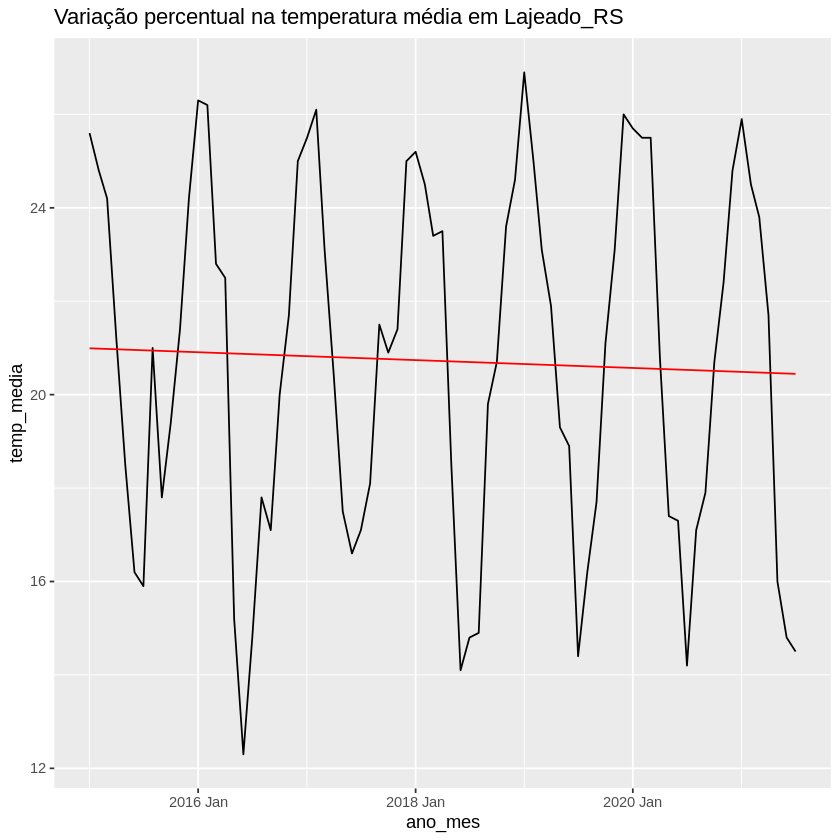

In [ ]:
augment(df) %>% ggplot() +
  geom_line(aes(x = ano_mes, y = temp_media)) +
  geom_line(aes(x = ano_mes, y = .fitted), color = "red") +
  ggtitle("Variação percentual na temperatura média em Lajeado_RS")

.model,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TSLM(temp_media ~ ano_mes),(Intercept),24.7781019650,1.119114e+01,2.2140830,0.02978189
TSLM(temp_media ~ ano_mes),ano_mes,-0.0002303373,6.345567e-04,-0.3629893,0.71760745


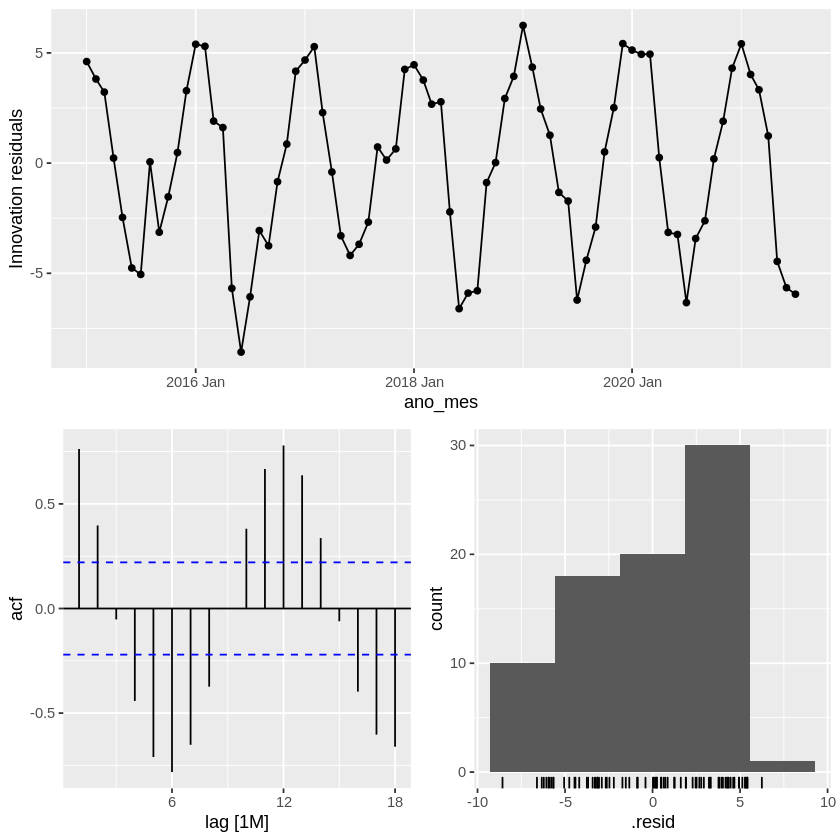

In [ ]:
df2 %>% gg_tsresiduals()
tidy(df)

In [ ]:
augment(df) %>%
  features(.innov, box_pierce, lag = 8, dof = 5)
augment(df) %>%
  features(.innov, ljung_box, lag = 8, dof = 5)

.model,bp_stat,bp_pvalue
<chr>,<dbl>,<dbl>
TSLM(temp_media ~ ano_mes),206.7063,0


.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
TSLM(temp_media ~ ano_mes),225.1736,0


In [ ]:
glimpse(df)

Rows: 1
Columns: 1
$ `TSLM(temp_media ~ ano_mes)` <model> [TSLM]


In [ ]:
df2 <- augment(df) %>%
  select(ano_mes, .fitted, .resid, .innov) %>%
  left_join(df, by = "ano_mes")

ERROR: ignored

###### *adorei o slide*  https://ctruciosm.github.io/ACA-228/ACA228_ST_04?panelset2=gr%25C3%25A1fico-12&panelset3=gr%25C3%25A1fico2#53 😆

#### Faça um gráfico dos valores observados (yt) e os valores estimados (^yt). 